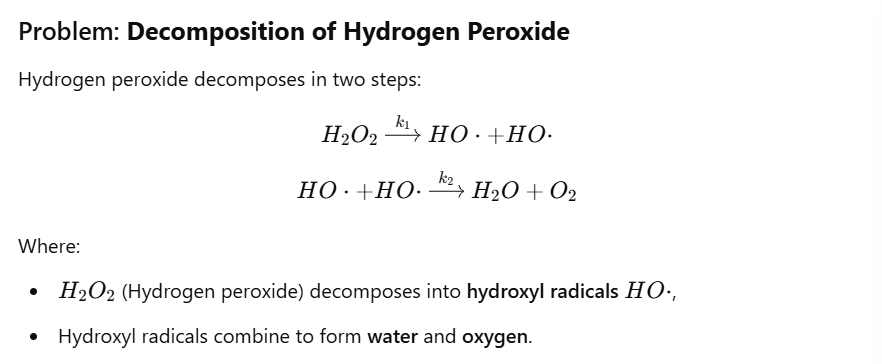
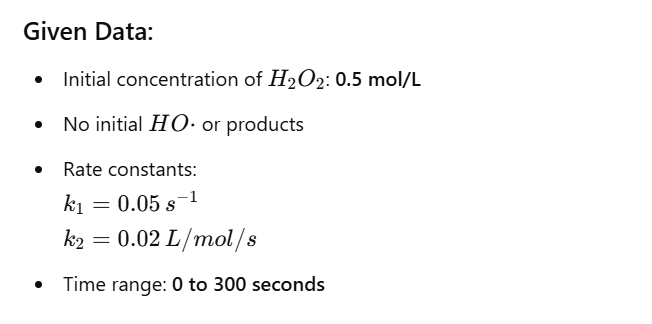
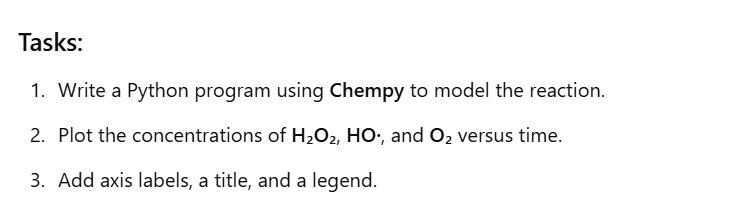

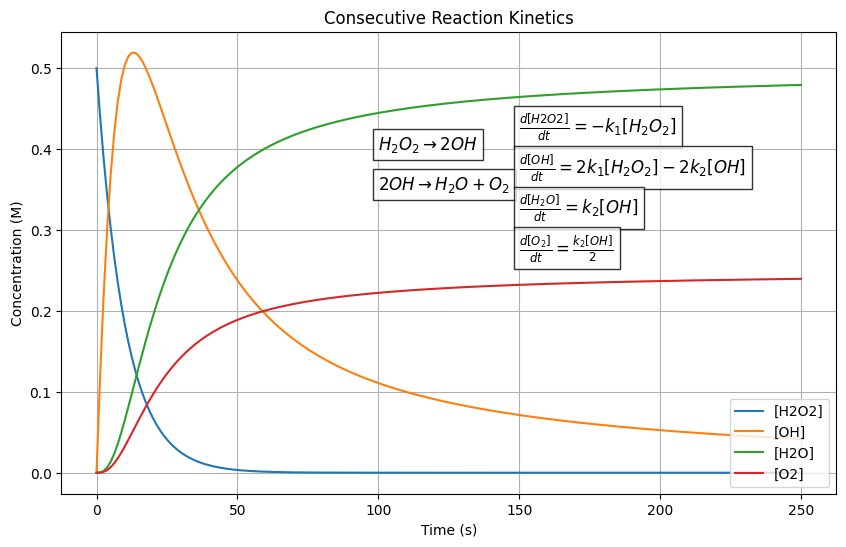

In [53]:
C0 =0.5 #mol/L
k1 = 0.1 #s^-1
k2 = 0.05 #l/mol.s

from chempy import Reaction, ReactionSystem
from chempy.kinetics.ode import get_odesys
import numpy as np
import matplotlib.pyplot as plt
reactions = [Reaction.from_string('H2O2 -> 2 OH', 'H2O2 OH', param=k1),
            Reaction.from_string('2 OH -> H2O + O2','OH H2O O2',param=k2)]
rsys=ReactionSystem(reactions, ['H2O2','OH', 'H2O','O2'])
c0={'H2O2':0.5, 'OH':0, 'H2O':0, 'O2':0}
t=np.linspace(0,250,200)

odesys, extra = get_odesys(rsys) #how concentrations of chemical species change over time
result=odesys.integrate(t,c0)

plt.figure(figsize=(10,6))
plt.plot(t, result.yout[:,0],label='[H2O2]') # Concentration of H2O2 at each time step
plt.plot(t, result.yout[:,1],label='[OH]')
plt.plot(t, result.yout[:,2], label='[H2O]')
plt.plot(t, 0.5*result.yout[:,2], label='[O2]')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.title('Consecutive Reaction Kinetics')
plt.grid(True)
plt.text(100, 0.4, r'$H_2O_2 \rightarrow 2OH$', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(100, 0.35, r'$2OH \rightarrow H_2O + O_2$', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(150, 0.42, r'$\frac{d[H2O2]}{dt} = -k_1 [H_2O_2]$',fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(150, 0.37, r'$\frac{d[OH]}{dt} = 2 k_1 [H_2O_2] - 2 k_2 [OH]$',fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(150, 0.32, r'$\frac{d[H_2O]}{dt} = k_2 [OH]$',fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(150, 0.27, r'$\frac{d[O_2]}{dt} =\frac{k_2 [OH]}{2}$',fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.legend(loc=(4));
plt.show()

The :, 0 means:

: → Select all time points.
0 → Select the first species in the list (H2O2).

# Reverse Kinetics Problem (Parameter Estimation)
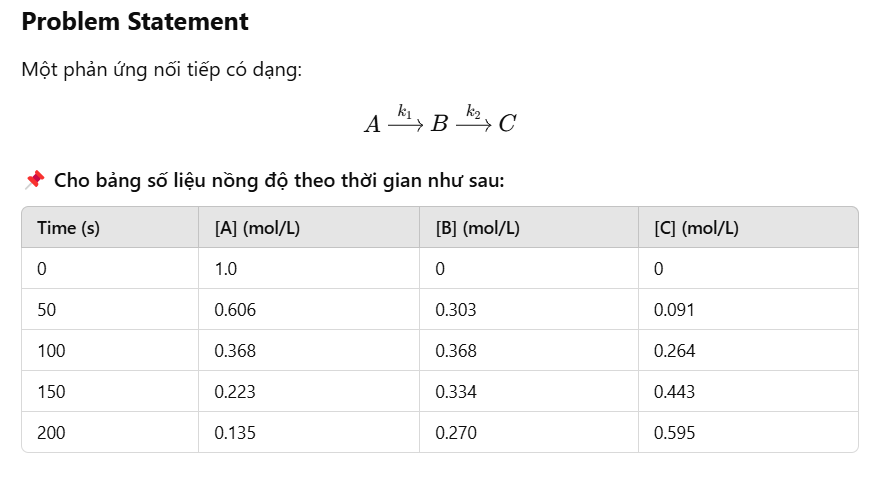
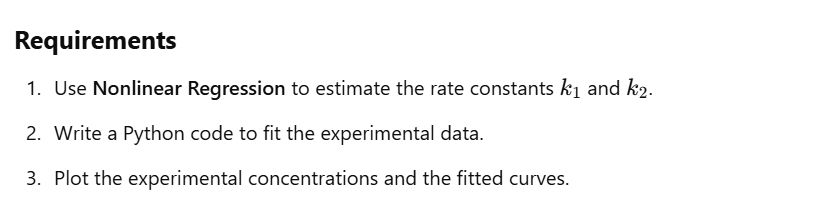

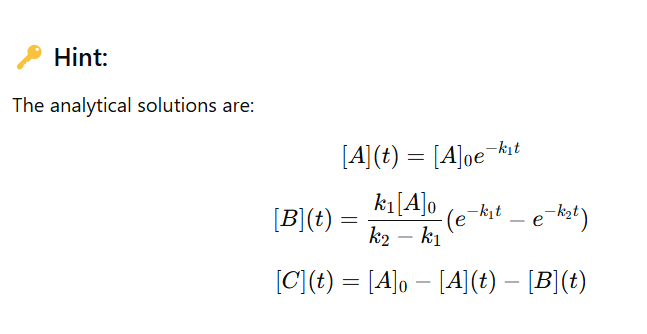

In [102]:
A = np.array([1.0, 0.606, 0.368, 0.223, 0.135])  # [A]
B = np.array([0, 0.303, 0.368, 0.334, 0.270])    # [B]
C = np.array([0, 0.091, 0.264, 0.443, 0.595])    # [C]
t = np.linspace(0,200,5)

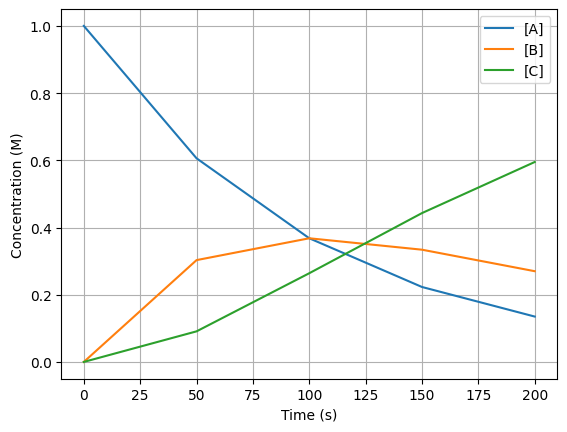

In [98]:
plt.plot(t,A, label='[A]')
plt.plot(t,B, label= '[B]')
plt.plot(t, C, label='[C]')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.grid(True)
plt.legend();

In [121]:
from scipy.optimize import curve_fit
A0=A[0]
def A_t(t,k1):
    return A0*np.exp(-k1*t)
def B_t(t,k2):
    return k1*A0/(k2-k1)*(np.exp(-k1*t)-np.exp(-k2*t))
def C_t(t):
    return A0-A_t(t,k1)-B_t(t,k2)

popt_A, _ = curve_fit(A_t, t, A, p0=(0.01,))
k1 = popt_A[0]
popt_B, _ = curve_fit(B_t, t, B, p0=(0.01,))
k2 = popt_B[0]
print(f'k1 = {k1:.2f}\nk2 = {k2:.2f}')

k1 = 0.01
k2 = 0.01


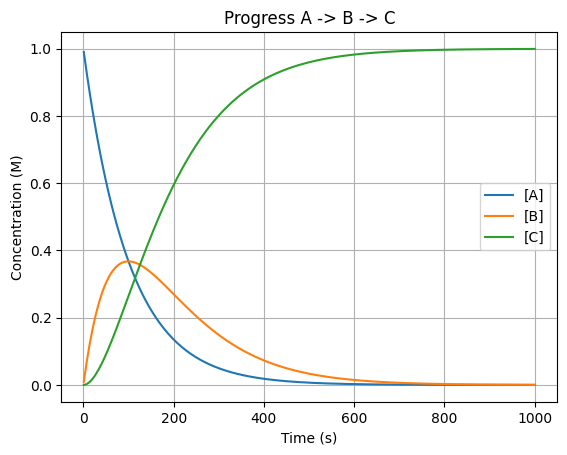

In [127]:
ti=np.linspace(1,1000,300)
Bi=[B_t(t,k2) for t in ti]
Ai=[A_t(t,k1) for t in ti]
Ci=[C_t(t) for t in ti]
plt.plot(ti,Ai,label='[A]')
plt.plot(ti, Bi,label='[B]')
plt.plot(ti,Ci, label='[C]')
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.title('Progress A -> B -> C')
plt.legend();

## find Bmax and t max

In [158]:
from scipy.optimize import minimize
def B_t_1(t):
    return A0-k1*A0/(k2-k1)*(np.exp(-k1*t)-np.exp(-k2*t))
t_max = minimize(fun =B_t_1, x0=99)

In [172]:
print(f'[B] max is {t_max.fun:.4f}M when t = t_max = {t_max.x[0]:.4f}s')

[B] max is 0.6324M when t = t_max = 99.9091s
